In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
import keras
print(keras.__version__)
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


2.0.9


In [17]:
a = 5
b = 3
x = random.random(30) * 5 #random x values [0, 5)
y = a*x + b #+ random.uniform()/100.0 # y is linear in x with some noise in [0, 1/100)

[ 1.36938038  0.38204473  3.91504071  2.09942905  2.51723514  3.71122665
  0.17180946  3.56825782  3.30540857  1.07545761  4.99722686  3.38878615
  4.73316368  4.73523115  0.33814757  1.76255473  3.70490914  4.38163027
  3.97005196  1.99266954  3.41968606  3.15806888  0.56576403  2.66791821
  0.86894257  1.05884585  3.43557965  0.24584161  4.89542729  0.29544262]
[  9.84690189   4.91022365  22.57520356  13.49714524  15.58617572
  21.55613326   3.85904729  20.84128909  19.52704285   8.37728807
  27.98613429  19.94393073  26.66581838  26.67615573   4.69073785
  11.81277364  21.52454572  24.90815136  22.85025982  12.96334768
  20.09843029  18.7903444    5.82882013  16.33959103   7.34471285
   8.29422926  20.17789827   4.22920807  27.47713645   4.4772131 ]


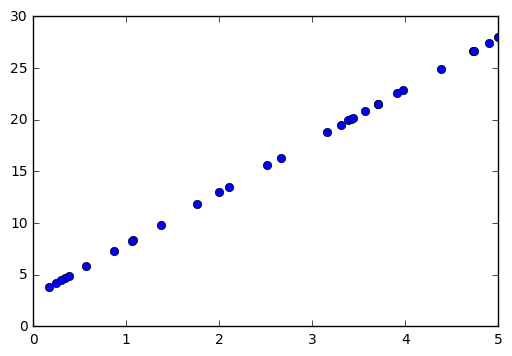

In [18]:
plt.plot(x,y, 'bo')
print(x)
print(y)

In [22]:
linearModel = Sequential()
#Dense default parameters: activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'
linearModel.add(Dense(1, input_shape=(1,), kernel_initializer='ones')) 
#Default SGD parameters: keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#SGD converges much much faster than rmsprop when deal with linear neural network
linearModel.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])
linearModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
linearModel.fit(x,y, batch_size=1, epochs=100) #Default: shuffle=True

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 22.6453 - acc: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 0s 991us/step - loss: 0.6261 - acc: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4572 - acc: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 0s 993us/step - loss: 0.3300 - acc: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 0s 994us/step - loss: 0.2386 - acc: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1767 - acc: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1284 - acc: 0.0000e+00
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0966 - acc: 0.0000e+00
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0698 - acc: 0.0000e+00
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0500 - acc: 0.0000e+00
Epoch 11/100

In [13]:
linearModel.evaluate(x,y)

1/1 [==============================] - 0s 1ms/step


[3.637978807091713e-12, 0.0]

In [21]:
linearModel.get_weights()

[array([[ 5.00000143]], dtype=float32), array([ 2.9999938], dtype=float32)]

In [114]:
t = random.randint(0,20,8)
print('t = %s'%t)
linearModel.predict(t)

t = [18  5 14  9 10  0 17 14]


array([[ 93.00907898],
       [ 28.00906754],
       [ 73.00907898],
       [ 48.00907135],
       [ 53.00907516],
       [  3.00905991],
       [ 88.00907898],
       [ 73.00907898]], dtype=float32)

In [132]:
linearModel.__dict__
dir(linearModel)

{'_flattened_layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 '_output_mask_cache': {'139912258949456_139913702890320': None},
 '_output_shape_cache': {},
 '_output_tensor_cache': {},
 'built': True,
 'container_nodes': {'dense_13_ib-0', 'dense_input_13_ib-0'},
 'inbound_nodes': [<keras.engine.topology.Node at 0x7f3fdc7e9b50>],
 'input_layers': [<keras.engine.topology.InputLayer at 0x7f3fdc7e90d0>],
 'input_layers_node_indices': [0],
 'input_layers_tensor_indices': [0],
 'input_names': ['dense_input_13'],
 'inputs': [dense_input_13],
 'layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 'loss': 'mse',
 'loss_weights': None,
 'metrics': ['accuracy'],
 'metrics_names': ['loss', 'acc'],
 'metrics_tensors': [mean],
 'model': <keras.engine.training.Model at 0x7f3fdc7dbfd0>,
 'name': 'sequential_15',
 'nodes_by_depth': {0: [<keras.engine.topology.Node at 0x7f3fdc7e9a90>],
  1: [<keras.engine.topology.Node at 0x7f3fdc7e9290>]},
 'optimizer': <keras.optimizers.SGD at 0x7f3fdc782bd

In [201]:
import keras
print(keras.__version__)

1.1.0


In [150]:
repr(linearModel)

'<keras.models.Sequential object at 0x7f3fdc7dbd90>'

In [191]:
import inspect
len(inspect.getsourcelines(Sequential))

2